Translating R code into Python code

In [1]:
import scipy as sp
from scipy.integrate import odeint
from scipy.integrate import solve_ivp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [12]:
def SICZ(t, x, params):
    S, I, C, Z = x
    N = S + I + C
    
    beta_p = params['beta_p']
    beta_c = params['beta_c']
    beta_z = params['beta_z']
    a = params['a']
    lamdaC = params['lamdaC']
    sigma = params['sigma']
    mu = params['mu']
    lamdaZ = params['lamdaZ']
    r = params.get('r', 0)   # recovery rate (not used in R code directly)
    
    dS = -(S * beta_p * (I / N)) - (S * beta_c * C) - (S * beta_z * Z)
    dI = (S * beta_p * (I / N)) + (S * beta_c * C) + (S * beta_z * Z) - (I * a)
    dC = (I * a) - (C * lamdaC)
    dZ = (I * sigma) + (C * mu) - (Z * lamdaZ)
    
    return [dS, dI, dC, dZ]


In [13]:
# --------------------------------------------------------------------------------
# Initial conditions
# --------------------------------------------------------------------------------
initial_large = [999, 1, 0, 0]   # S, I, C, Z
initial_med   = [99, 1, 0, 0]
initial_small = [9, 1, 0, 0]

# Time points
times = np.linspace(0, 365, 365)

# Parameters
params = {
    "beta_p": 0.023,
    "beta_c": 0.023,
    "beta_z": 0.0001,
    "lamdaC": 1/4,
    "lamdaZ": 1/21.6,
    "sigma": 0.001,
    "mu": 0.01,
    "a": 1/26.5
}

# --------------------------------------------------------------------------------
# Run simulation utility
# --------------------------------------------------------------------------------
def run_simulation(model, y0, t_span, params, t_eval, labels):
    sol = solve_ivp(model, t_span, y0, t_eval=t_eval, args=(params,))
    results = pd.DataFrame(sol.y.T, columns=labels)
    results["time"] = sol.t
    return results

# --------------------------------------------------------------------------------
# Run SICZ model for Large, Medium, Small
# --------------------------------------------------------------------------------
results_large = run_simulation(SICZ, initial_large, (0, 365), params, times, labels=["S","I","C","Z"])
results_med   = run_simulation(SICZ, initial_med, (0, 365), params, times, labels=["S","I","C","Z"])
results_small = run_simulation(SICZ, initial_small, (0, 365), params, times, labels=["S","I","C","Z"])

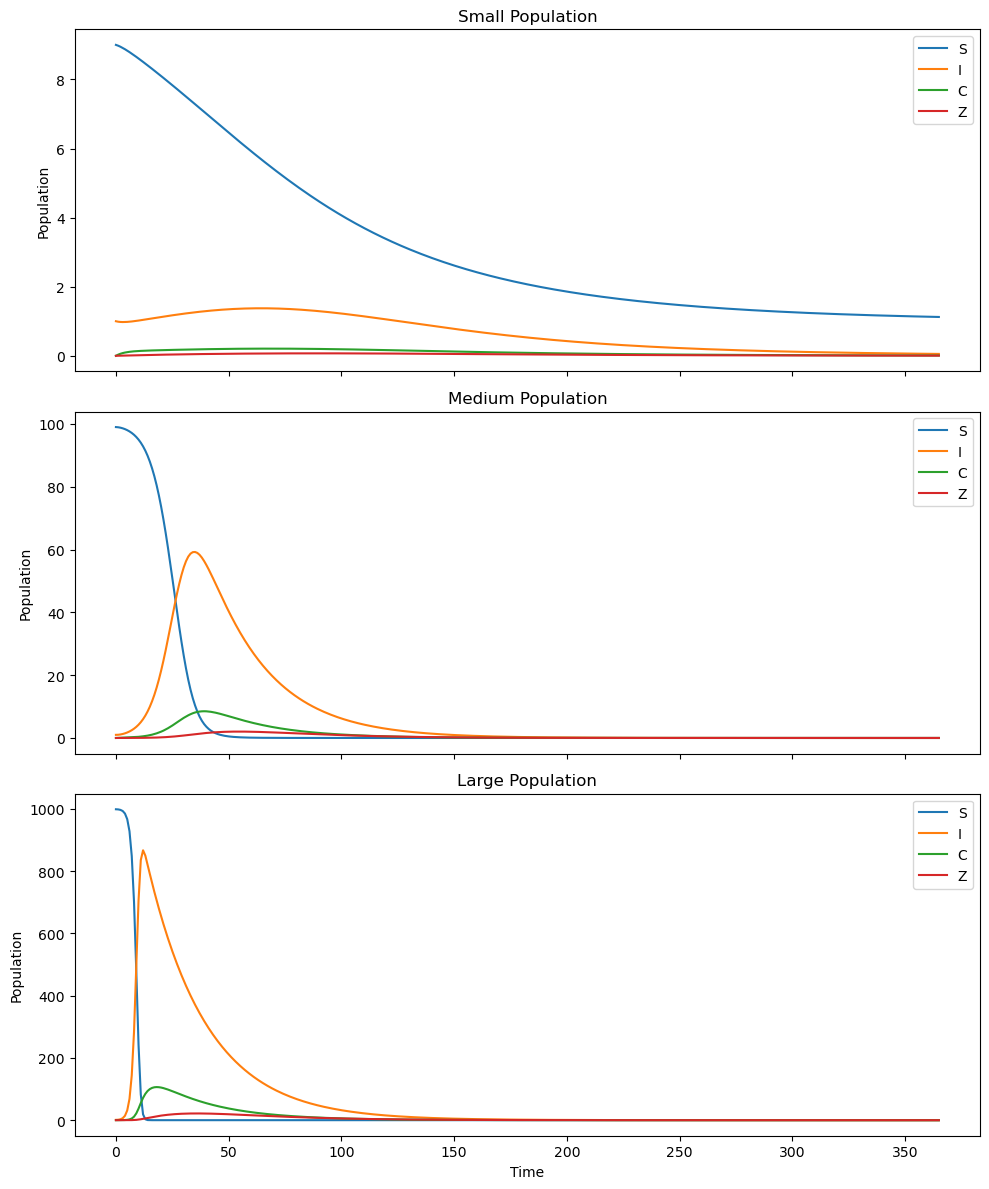

In [14]:
# Multi-panel plotting
def plot_all(results_small, results_med, results_large):
    fig, axes = plt.subplots(3, 1, figsize=(10, 12), sharex=True)

    # Small Population
    axes[0].plot(results_small["time"], results_small["S"], label="S")
    axes[0].plot(results_small["time"], results_small["I"], label="I")
    axes[0].plot(results_small["time"], results_small["C"], label="C")
    axes[0].plot(results_small["time"], results_small["Z"], label="Z")
    axes[0].set_title("Small Population")
    axes[0].set_ylabel("Population")
    axes[0].legend()

    # Medium Population
    axes[1].plot(results_med["time"], results_med["S"], label="S")
    axes[1].plot(results_med["time"], results_med["I"], label="I")
    axes[1].plot(results_med["time"], results_med["C"], label="C")
    axes[1].plot(results_med["time"], results_med["Z"], label="Z")
    axes[1].set_title("Medium Population")
    axes[1].set_ylabel("Population")
    axes[1].legend()

    # Large Population
    axes[2].plot(results_large["time"], results_large["S"], label="S")
    axes[2].plot(results_large["time"], results_large["I"], label="I")
    axes[2].plot(results_large["time"], results_large["C"], label="C")
    axes[2].plot(results_large["time"], results_large["Z"], label="Z")
    axes[2].set_title("Large Population")
    axes[2].set_xlabel("Time")
    axes[2].set_ylabel("Population")
    axes[2].legend()

    plt.tight_layout()
    plt.show()

# Call the combined plot
plot_all(results_small, results_med, results_large)


Reflection
- Downloaded the R file, imported the R file into the corresponding VS code folder
- Initally translated the R packages into Python packages using Chat GPT
- Grab the first chunck of R code and asked Chat to translate the previous R code directly into Python with the previous packages
- Copy and pasted the plotting of the R code and translated it into Python as well
- When prompting Chat, make sure to chunck and relay how the corresponding code works
- Also, do not copy and paste the ENTIRE code into Chat because it will skip out on some aspect of the code like the graphing portion